In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler ,LabelEncoder , OneHotEncoder
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier





In [26]:
# load the dataset 

data=pd.read_csv(r"C:\python and machine learning\heart.csv")

In [28]:
# exploratory data analysis(EDA)

print(data.head())
print(data.info())
print(data.describe())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

In [30]:
# storing all coloumns in a list expect for the heart disease one which we have to predict
list1=data.columns[:-1]
list1  

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'],
      dtype='object')

In [32]:
# checking for missing values 
print(data.isnull().sum())
# we get no null data values  so we don't need to impute anything 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


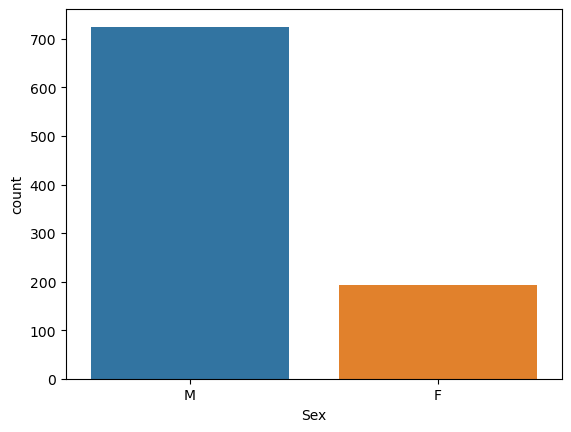

In [34]:
# visualizing target variable with respect to age
sns.countplot (x='Sex',data=data)
plt.show()


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


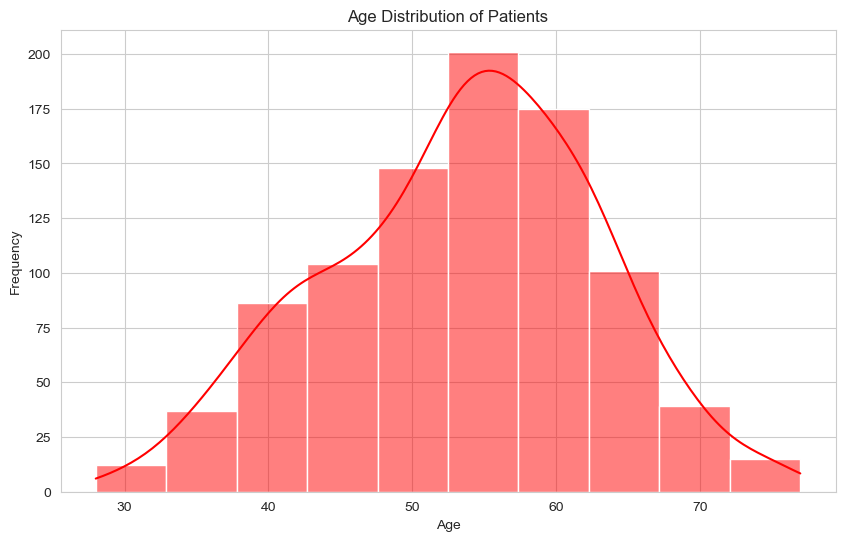

In [36]:
# visualizing target variable with respect to age 

# set background style of the plot 
sns.set_style('whitegrid')

#plotting histogram for age 
plt.figure(figsize=(10,6))
sns.histplot(data['Age'] , kde=True , color='red' , bins=10)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [47]:
# hypothetical interpretation based on histogram :

# The histogram shows a bell-shaped distribution centered around ages 50 to 60.
# There is a peak around the age of 55 , indicating there is a significant number of patients in this age group.
# The distribution is slightly right skewed , suggesting there are more patients older than the mean age.
# The age range of patients varies from about 30 to 77 years.
# There are increasing number of patients in the younger age groups(40-45)
# The older age groups (above 70) , has a depreciating peak which which indicates once someone crosses the age of 70 heart disease is less common.

In [38]:
# Encoding catagorical figures 
# converting string to numbers 

label_encoders={}
categorical_columns=['Sex','ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for colomn in categorical_columns:
    label_encoders[colomn]=LabelEncoder()
    data[colomn]=label_encoders[colomn].fit_transform(data[colomn])
data




,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


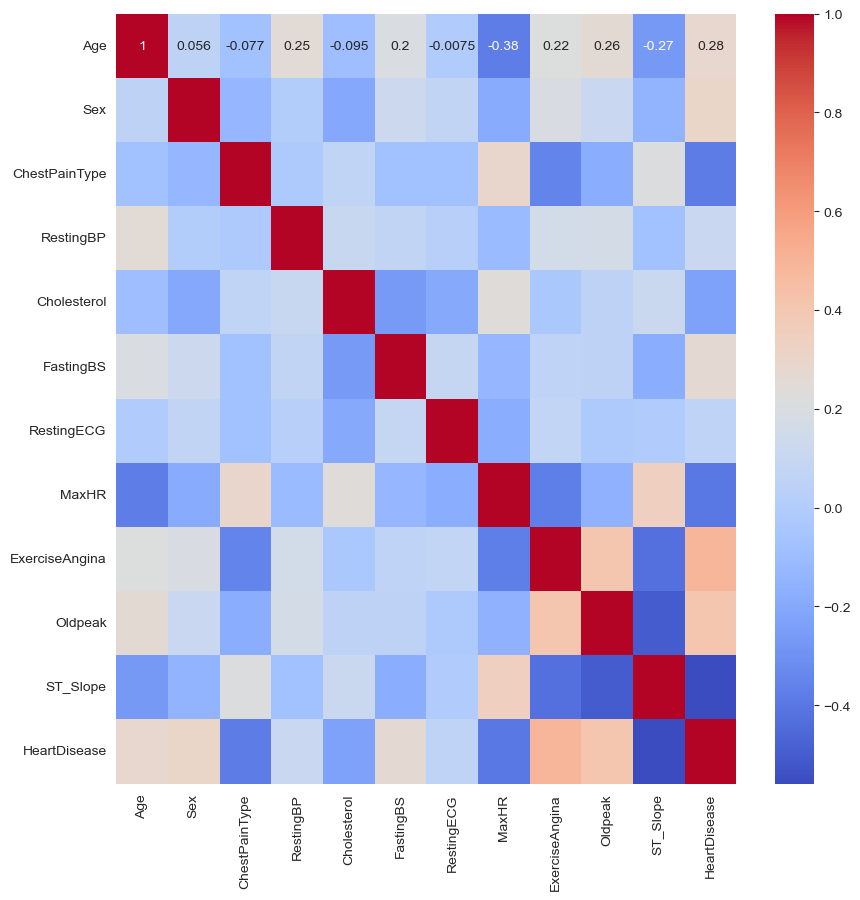

In [64]:
# visualizing correlations 

fig=plt.figure(figsize=(10,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix , annot=True , cmap='coolwarm')

plt.show()

In [66]:
# Using Correlation for Feature Reduction 

# Identify strong correlations with Target :
#  - focus on features with high absolute correlation values with target variable.
#  -These features are likely to be more important for prediction.

# Remove redundant feautures 

#  - if two features are highly correlated with each other i.e correlation>0.8 consider removing one of them.
#  -keeping both may not provide additional value and lead to overfitting.

In [40]:
# Input 

x=data.iloc[:,:-1].values

#Output 
y=data.iloc[:,-1].values 



In [42]:
x,y

(array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
        [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
        [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
        ...,
        [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
        [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
        [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0,

In [44]:
# Feature selection 
# Selecting the best features using SelectKBest 

from sklearn.feature_selection import SelectKBest,chi2,mutual_info_classif,f_classif

selector=SelectKBest(f_classif,k=5) 
X_new=selector.fit_transform(x,y)
print(X_new)

[[  1.  172.    0.    0.    2. ]
 [  2.  156.    0.    1.    1. ]
 [  1.   98.    0.    0.    2. ]
 ...
 [  0.  115.    1.    1.2   1. ]
 [  1.  174.    0.    0.    1. ]
 [  2.  173.    0.    0.    2. ]]


In [76]:
x


array([[40. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       [49. ,  0. ,  2. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  1. , ...,  0. ,  0. ,  2. ],
       ...,
       [57. ,  1. ,  0. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  1. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  2. , ...,  0. ,  0. ,  2. ]])

In [46]:
# feauture scaling ----to remove error that could be there due to presence of units 

scaler=StandardScaler()
scaled_features=scaler.fit_transform(X_new)
scaled_features 


array([[ 0.22903206,  1.38292822, -0.8235563 , -0.83243239,  1.05211381],
       [ 1.27505906,  0.75415714, -0.8235563 ,  0.10566353, -0.59607813],
       [ 0.22903206, -1.52513802, -0.8235563 , -0.83243239,  1.05211381],
       ...,
       [-0.81699495, -0.85706875,  1.21424608,  0.29328271, -0.59607813],
       [ 0.22903206,  1.4615246 , -0.8235563 , -0.83243239, -0.59607813],
       [ 1.27505906,  1.42222641, -0.8235563 , -0.83243239,  1.05211381]])

In [48]:
#splitting the dataset 

X_train,X_test,y_train,y_test=train_test_split(scaled_features,y,test_size=0.2,random_state=0)

#classification algorithms 

classifiers={
    'Logistic Regression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine':SVC(),
    'K-Nearest Neighbours':KNeighborsClassifier()
    
}

In [100]:
# Training and evaluating Classifiers

results={}
for name,clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test) #prediction is done on test data
    cm = confusion_matrix(y_test,y_pred) #confusion matrix for logistic regression is made result of tested and predicted data .
    print(f'Confusion Matrix for{name}:\n',cm)
    accuracy=accuracy_score(y_test,y_pred)
    results[name]=accuracy
    print(f'{name}Accuracy:{accuracy*100:.2f}%')
    print(classification_report(y_test,y_pred))
    print('_________________________________________________________________________________________')

Confusion Matrix forLogistic Regression:
 [[59 18]
 [23 84]]
Logistic RegressionAccuracy:77.72%
              precision    recall  f1-score   support

           0       0.72      0.77      0.74        77
           1       0.82      0.79      0.80       107

    accuracy                           0.78       184
   macro avg       0.77      0.78      0.77       184
weighted avg       0.78      0.78      0.78       184

_________________________________________________________________________________________
Confusion Matrix forDecision Tree:
 [[57 20]
 [20 87]]
Decision TreeAccuracy:78.26%
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        77
           1       0.81      0.81      0.81       107

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184

____________________________________________________________________________

In [50]:
# finding the best classifier 

best_classifier=max(results,key=results.get)
print(f'Best Classifier is: {best_classifier} with Accuracy: {results[best_classifier]:.4f}')

NameError: name 'results' is not defined

In [52]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt 

# Calculate ROC curve 
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

#Calculate AUC
roc_auc=auc(fpr,tpr)

#plot ROC curve 
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f'ROC curve (AUC area={roc_auc}')
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle='--')
plt.xlim([0.0,1.0]) 
plt.ylim([0.0,1.0])
plt.xlabel('False positive rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

# the roc_function calculates the tpr and fpr at various thresholds 
# the auc function calculates the area under roc curve.
# auc ranges from 0.5 to 1 with higher values indicating better classifier perfoermance.


NameError: name 'y_pred' is not defined

In [54]:
# optimizing logistic regression 

from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.linear_model import LogisticRegression 






# Define the model
logistic_regression = LogisticRegression()



# define the parameter grid 

param_grid={
    'C':[0.001,0.01,0.1,1,10],
    'penalty':['l1','l2'],
    'solver':['liblinear','saga'],}

# create a logistic regression model 
logistic_regression=LogisticRegression(max_iter=1000)

# create GridSearchCV
grid_search=GridSearchCV(estimator=logistic_regression,param_grid=param_grid,cv=5,scoring='accuracy')

# fit GridSearchCv

grid_search.fit(X_train,y_train)

#get the best parameters and the best score 
best_params=grid_search.best_params_
best_score=grid_search.best_score_

# use the best model to predict 

best_pred=grid_search.predict(X_test)










In [56]:
print('Best Parameters:',best_params)
print('Best Score:',best_score)

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
Best Score: 0.8378715869909609


In [58]:
best_model=grid_search.best_estimator_
print('Best Model:',best_model)


Best Model: LogisticRegression(C=0.1, max_iter=1000, solver='saga')


In [72]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

# Predict on test set 
y_pred=best_model.predict(X_test)

# calculate performance statistics 
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
conf_matrix=confusion_matrix(y_test,y_pred)

print(f'Accuracy:{accuracy:.4f}')
print(f'Precision:{precision:.4f}')
print(f'Recall:{recall:.4f}')
print(f'F1 Score:{f1:.4f}')
print(f'Confusion Matrix:\n',conf_matrix)


Accuracy:0.7772
Precision:0.7800
Recall:0.7772
F1 Score:0.7780
Confusion Matrix:
 [[59 18]
 [23 84]]


In [76]:
param_grid={
    'max_depth':[None,3,4,5,6,7],
    'min_samples_split':[2,5,7],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

In [82]:
dt=DecisionTreeClassifier(random_state=42)
grid_search=GridSearchCV(dt,param_grid,cv=5,scoring='accuracy',verbose=1)

In [84]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 7]},
             scoring='accuracy', verbose=1)

In [86]:
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_

print('Best Parameters:',best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [88]:
#predict on test set 
y_pred=best_model.predict(X_test)

#calculate performance metrics 
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
conf_matrix=confusion_matrix(y_test,y_pred)

print(f'Accuracy:{accuracy:.4f}')
print(f'Precision:{precision:.4f}')
print(f'Recall:{recall:.4f}')
print(f'F1 Score:{f1:.4f}')
print(f'Confusion Matrix:\n',conf_matrix)

Accuracy:0.8261
Precision:0.8254
Recall:0.8261
F1 Score:0.8254
Confusion Matrix:
 [[59 18]
 [14 93]]


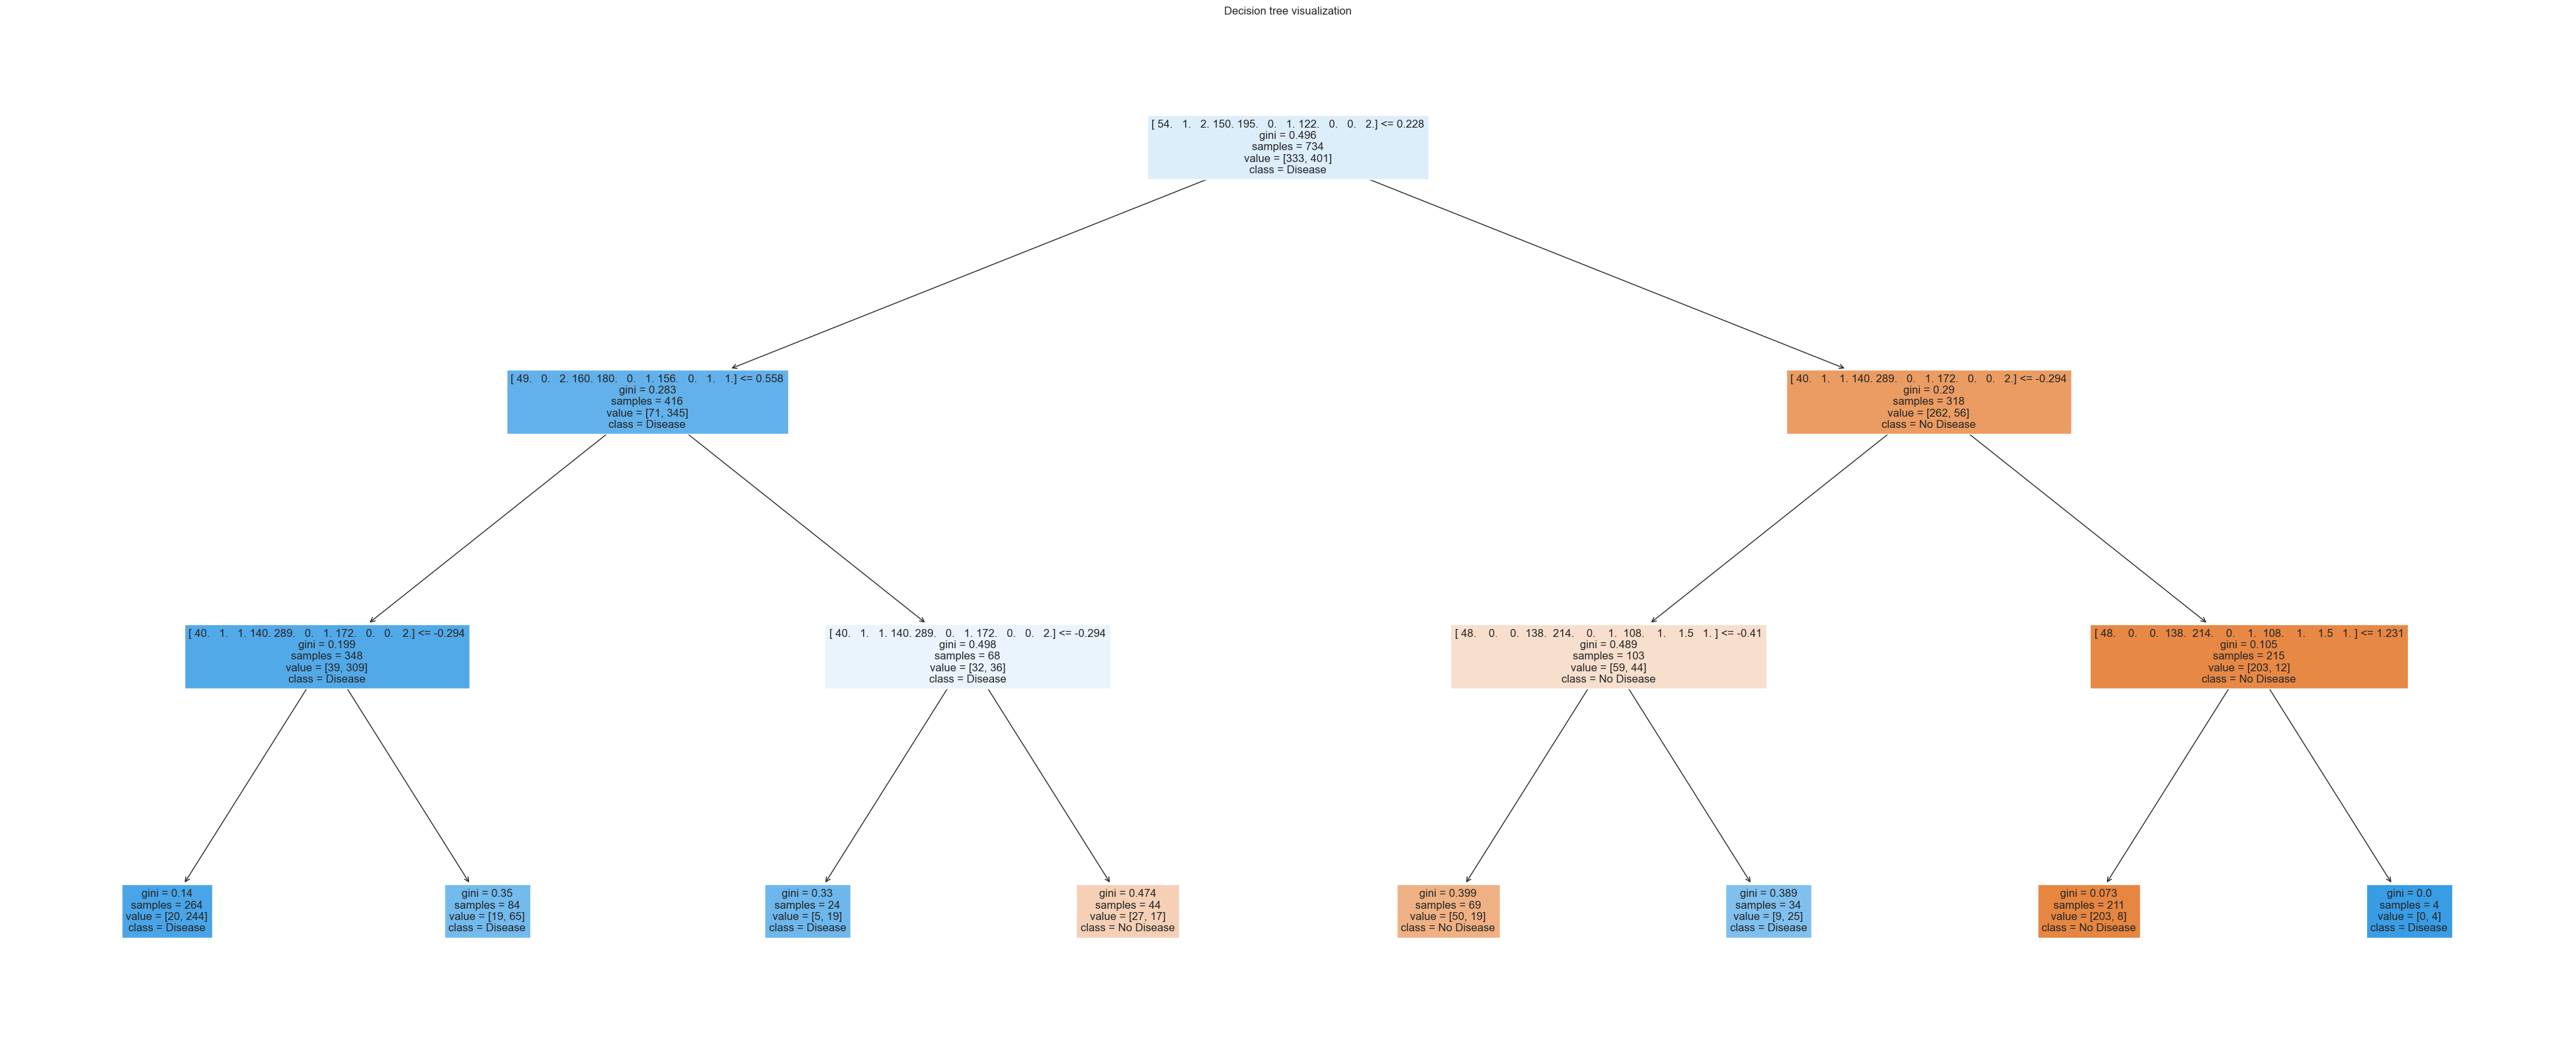

In [94]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree

#Get the best model 
best_model=grid_search.best_estimator_

#Plot the decision tree
plt.figure(figsize=(50,20))
plot_tree(best_model,feature_names=x,filled=True,class_names=['No Disease','Disease'])
plt.title('Decision tree visualization')
plt.show()
          

In [96]:
# applying Boosting 


In [98]:
from sklearn.ensemble import AdaBoostClassifier 

#Initialise base decision tree classifier 
base_dt=DecisionTreeClassifier(max_depth=5,random_state=42)

#Initialize Adaboost classifier with decision tree as base estimator 
adaboost_clf=AdaBoostClassifier(base_estimator=base_dt,n_estimators=50,random_state=42)

In [100]:
adaboost_clf.fit(X_train,y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         random_state=42),
                   random_state=42)

In [102]:
#Predict on test set 

y_pred=adaboost_clf.predict(X_test)

#calculate performance 
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
f1=f1_score(y_test,y_pred,average='weighted')
conf_matrix=confusion_matrix(y_test,y_pred)

print(f'Accuracy:{accuracy:.4f}')
print(f'Precision:{precision:.4f}')
print(f'Recall:{recall:.4f}')
print(f'F1 Score:{f1:.4f}')
print(f'Confusion Matrix:\n',conf_matrix)

Accuracy:0.7935
Precision:0.7970
Recall:0.7935
F1 Score:0.7944
Confusion Matrix:
 [[61 16]
 [22 85]]


In [104]:
adaboost_clf.feature_importances_

array([0.09619673, 0.49482363, 0.06266567, 0.27588422, 0.07042975])